<a href="https://colab.research.google.com/github/PeterYves/DIC-ML-Assignmnent/blob/main/sprint_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Logistic regression Sprint**

---



> ### [Problem 1-4] Implement ScratchLogisticRegression

---

- 【problem1】Hypothetical function
- 【problem2】Steepest descent
- 【problem 3】Estimated
- 【problem 4】Objective function (loss function)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class ScratchLogisticRegression():
    """
    Scratch implementation of logistic regression
    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    no_bias : bool
      True if no bias term is included
    verbose : bool
      True to output the learning process
    Attributes
    ----------
    self.coef_ : The following form of ndarray, shape (n_features,)
      Parameters
    self.loss : The following form of ndarray, shape (self.iter,)
      Record losses on training data
    self.val_loss : The following form of ndarray, shape (self.iter,)
      Record loss on validation data
    """
    def __init__(self, num_iter=1000, lr=0.01, reg=1, no_bias=False, verbose=False):
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        self.reg = reg
        # Prepare an array to record the loss
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn logistic regression. If validation data is entered, the loss and accuracy for it are also calculated for each iteration.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        X_val : The following forms of ndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : The following form of ndarray, shape (n_samples,)
            Correct value of verification data
        """
        n_samples, n_features = X.shape
        
        if not self.no_bias:
            # Append bias column to X
            X = np.hstack([np.ones([n_samples, 1]), X])
        
        # Prepare theta for hypotheis function
        self.theta = np.random.rand(n_features + (1 - self.no_bias))
        
        for i in range(self.iter):
            y_hyp = self._hypothetical_function(X)
            self.theta = self._gradient_descent(X, y, y_hyp)
            self.loss[i] = self._loss_function(y_hyp, y)
            
            if X_val is not None and y_val is not None:
                y_predict = self.predict_proba(X_val, False)
                self.val_loss[i] = self._loss_function(y_predict, y_val)
                
        if self.verbose:
            #Output learning process when verbose is set to True
            print("Loss: {}".format(self.loss))
            print("Val_loss: {}".format(self.val_loss))

       # save theta
        np.save('theta', self.theta) 

    def predict(self, X):
        """
        Estimate the label using logistic regression.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample
        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result by logistic regression
        """
        if not self.no_bias:
            n_samples = X.shape[0]
            X = np.hstack([np.ones([n_samples, 1]), X])
        y_pred = self._hypothetical_function(X)
        return np.round(y_pred).astype('int64')
    
    def predict_proba(self, X, displayMode=True):
        """
        Estimate the probability using logistic regression.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample
        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result by logistic regression
        """
        if not self.no_bias:
            n_samples = X.shape[0]
            X = np.hstack([np.ones([n_samples, 1]), X])
        y_pred = self._hypothetical_function(X)
        return np.hstack([(1-y_pred).reshape(-1, 1), y_pred.reshape(-1, 1)]) if displayMode else y_pred
    
    def _hypothetical_function(self, X):
        y_hyp = 1 / (1 + np.exp(-np.dot(X, self.theta.T)))
        return y_hyp
    
    def _gradient_descent(self, X, y, y_hyp):
        n_samples, n_features = X.shape
        if not self.no_bias:
            update_theta = np.zeros([n_features])
            update_theta[0] = self.theta[0] - np.dot((y_hyp - y), X[:, 0]) / n_samples
            update_theta[1:] = self.theta[1:] - (np.dot((y_hyp - y), X[:, 1:])  + self.reg * self.theta[1:]) / n_samples
            return update_theta
        else:
            update_theta = self.theta - np.dot((y_hyp - y), X) + self.reg * self.theta
            return update_theta
    
    def _loss_function(self, y_pred, y):
        n_samples = X.shape[0]
        if not self.no_bias:
            yr = y[1:]
            yp = y_pred[1:]
            theta = self.theta[1:]
        loss = (np.mean((-yr * np.log(yp)) - (1 - yr) * np.log(1 - yp))
                + self.reg * np.sum(theta ** 2) / (2 * n_samples))
        return loss

In [3]:
def scratch_train_test_split(X, y, train_size=0.8):
    """Divide the validation data.
    Parameters
    ----------
    X : ndarray
      Training data (n_samples, n_features)
    y : ndarray
      Correct answer value (n_samples,)
    train_size : float
      Specify what percentage to use as a train (0 < train_size < 1)
    Returns
    -------
    X_train : ndarray
      Training data (n_samples, n_features)
    X_test : ndarray
      Validation data (n_samples, n_features)
    y_train : ndarray
      Correct answer value of training data (n_samples,)
    y_test : ndarray
      Correct value of verification data (n_samples,)
    """
    # Write code here
    if train_size<=0 or train_size >= 1:
         raise ValueError('train_size={0} should be a float in the '
                         '(0, 1) range'.format(train_size))
    train_size = int(train_size*X.shape[0])
    idx = np.arange(X.shape[0])
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]
    split = np.split(X, [train_size])
    X_train = split[0]
    X_test = split[1]
    split = np.split(y, [train_size])
    y_train = split[0]
    y_test = split[1]
    return X_train, X_test, y_train, y_test

~ Let's test `ScratchLogisticRegression` with an example array.

In [4]:
import warnings
warnings.filterwarnings('ignore')

X = np.array([
    [1, 2],
    [1, 2.2],
    [0.9, 2.5],
    [5, 8],
    [0.6, 1.8],
    [5, 8],
    [5, 8],
    [5.2, 8.2]
])
X.shape

(8, 2)

In [5]:
y = np.array([0, 0, 0, 1, 0, 1, 1, 1])
y.shape

(8,)

In [6]:
slr = ScratchLogisticRegression(100, verbose=True)

slr.fit(X, y)

Loss: [1.19024128 2.21142029 3.82028896 1.81693677 0.42933112 2.42278083
        nan 1.75782981 0.36819873 0.77383965 1.40344502 0.23569923
 0.36171521 0.43510633 0.19523806 0.15815683 0.25634927 0.23660589
 0.17865589 0.1387757  0.2056745  0.16471103 0.16711274 0.12539544
 0.17681552 0.13158573 0.15844578 0.11560062 0.15813143 0.1137655
 0.14974825 0.10719558 0.1458404  0.10378034 0.14105743 0.10034157
 0.13709495 0.09765172 0.13342539 0.09540566 0.1300766  0.09355689
 0.12699447 0.09203991 0.12414271 0.0908048  0.12149133 0.08981115
 0.11901559 0.08902592 0.11669504 0.08842186 0.11451278 0.08797614
 0.11245495 0.0876694  0.11051035 0.08748486 0.10867016 0.08740758
 0.10692772 0.08742389 0.1052784  0.08752081 0.1037194  0.08768557
 0.10224962 0.08790532 0.10086939 0.08816683 0.09958012 0.08845653
 0.09838393 0.08876062 0.09728307 0.08906552 0.09627932 0.08935846
 0.0953735  0.0896282  0.09456487 0.0898657  0.09385094 0.09006466
 0.09322728 0.09022175 0.09268778 0.09033651 0.09222492 0

In [7]:
slr.predict(X)

array([0, 0, 0, 1, 0, 1, 1, 1])

In [8]:
slr.predict_proba(X)

array([[0.94949568, 0.05050432],
       [0.94259442, 0.05740558],
       [0.93389932, 0.06610068],
       [0.03776383, 0.96223617],
       [0.9637466 , 0.0362534 ],
       [0.03776383, 0.96223617],
       [0.03776383, 0.96223617],
       [0.02992125, 0.97007875]])

In [9]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X, y)
lr_predict = lr.predict(X)
display(lr_predict)

array([0, 0, 0, 1, 0, 1, 1, 1])

In [10]:
lr_predict_proba = lr.predict_proba(X)
display(lr_predict_proba)

array([[0.96904855, 0.03095145],
       [0.96410172, 0.03589828],
       [0.95749258, 0.04250742],
       [0.03468182, 0.96531818],
       [0.97841919, 0.02158081],
       [0.03468182, 0.96531818],
       [0.03468182, 0.96531818],
       [0.02690799, 0.97309201]])

> ### [Problem 5] Learning and estimation

---



In [11]:
X = pd.DataFrame(data=load_iris().data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
y = pd.DataFrame(load_iris().target, columns=[('Species')])
df = pd.concat([X, y], axis=1)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
df = df[["sepal_length", "petal_length", "Species"]][df['Species'] != 0]
df

,sepal_length,petal_length,Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


In [13]:
X = df[["sepal_length", "petal_length"]].values
y = df['Species'].values

In [14]:
# Encode the Species value from (1,2) to (0,1)
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(75, 2) (25, 2) (75,) (25,)


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
from sklearn.metrics import *

def evaluation(test, predict):
    acc_score = accuracy_score(test, predict)
    prec_score = precision_score(test, predict)
    rec_score = recall_score(test, predict)
    f_score = f1_score(test, predict)
    conf_matrix = confusion_matrix(test, predict)
    print('Accuracy : {:.3f}'.format(acc_score))
    print('Precision: {:.3f}'.format(prec_score))
    print('Recall   : {:.3f}'.format(rec_score))
    print('F        : {:.3f}'.format(f_score))
    print('Confusion matrix:\n', conf_matrix)

In [18]:
# Scratch Logistc regression Learning

slr = ScratchLogisticRegression()
slr.fit(X_train_scaled, y_train, X_test_scaled, y_test)
slr_predict = slr.predict(X_test_scaled)

pd.DataFrame([y_test, slr_predict], index=['Actual value', 'Predicted value'])

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Actual value,0,1,1,0,0,0,1,0,0,1,...,0,1,1,0,1,0,0,1,0,0
Predicted value,1,1,1,0,0,1,1,0,0,1,...,0,1,1,0,1,0,0,1,0,0


In [19]:
evaluation(y_test, slr_predict)

Accuracy : 0.920
Precision: 0.833
Recall   : 1.000
F        : 0.909
Confusion matrix:
 [[13  2]
 [ 0 10]]


In [20]:
# Scikit-learn Logistc regression Learning

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
lr_predict = lr.predict(X_test_scaled)

pd.DataFrame([y_test, lr_predict], index=['Actual value', 'Predicted value'])

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Actual value,0,1,1,0,0,0,1,0,0,1,...,0,1,1,0,1,0,0,1,0,0
Predicted value,1,1,1,0,0,1,1,0,0,1,...,0,1,1,0,1,0,0,1,0,0


In [21]:
evaluation(y_test, slr_predict)

Accuracy : 0.920
Precision: 0.833
Recall   : 1.000
F        : 0.909
Confusion matrix:
 [[13  2]
 [ 0 10]]


In [22]:
# Scratch Learning (with regularization parameter=0.1)

slr2 = ScratchLogisticRegression(reg=0.1)
slr2.fit(X_train_scaled, y_train, X_test_scaled, y_test)
slr2_predict = slr.predict(X_test_scaled)

pd.DataFrame([y_test, slr_predict], index=['Actual value', 'Predicted value'])

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Actual value,0,1,1,0,0,0,1,0,0,1,...,0,1,1,0,1,0,0,1,0,0
Predicted value,1,1,1,0,0,1,1,0,0,1,...,0,1,1,0,1,0,0,1,0,0


In [23]:
evaluation(y_test, slr2_predict)

Accuracy : 0.920
Precision: 0.833
Recall   : 1.000
F        : 0.909
Confusion matrix:
 [[13  2]
 [ 0 10]]


> ### [Problem 6] Plot of learning curve

---



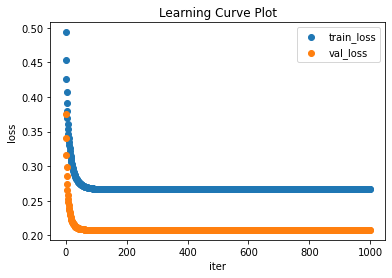

In [24]:
plt.title('Learning Curve Plot')
plt.xlabel('iter')
plt.ylabel('loss')
plt.scatter(range(slr.iter), slr.loss, label='train_loss')
plt.scatter(range(slr.iter), slr.val_loss, label='val_loss')
plt.legend()
plt.show()

> ### [Problem 7] Visualization of decision area

---



In [25]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

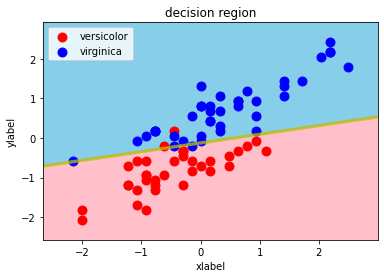

In [26]:
decision_region(X_train_scaled, y_train, slr2) #Scratch (C=0.1)

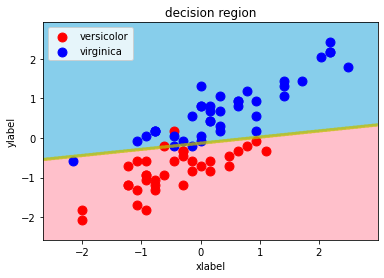

In [27]:
decision_region(X_train_scaled, y_train, slr) #Scratch (C=1)

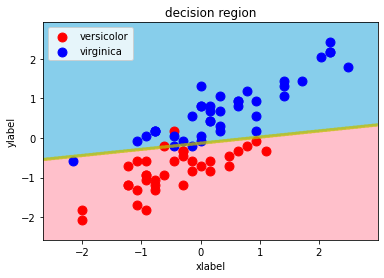

In [28]:
decision_region(X_train_scaled, y_train, lr) # Sklearn

> ### [Problem 8] (Advance assignment) Saving weights

---

> Indented block





In [29]:
np.load('theta.npy')

array([ 0.79000671, -1.41017591,  6.42081711])